In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
users= pd.read_csv('//mcrtp-file-01/users/brady.pearce/My Documents/Python Scripts/Project Files/relax_challenge/takehome_users.csv', encoding = None)
engage = pd.read_csv('//mcrtp-file-01/users/brady.pearce/My Documents/Python Scripts/Project Files/relax_challenge/takehome_user_engagement.csv')

In [81]:
print(users.head())
print(engage.head())

   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   

In [82]:
print(users.info(), engage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count  

In [144]:
print(users.isna().sum())
print(engage.isna().sum())

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64
time_stamp    0
user_id       0
visited       0
Time          0
Week          0
dtype: int64


In [145]:
users.fillna(0, inplace=True)
engage.fillna(0, inplace=True)
print(users['creation_source'].value_counts())

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64


In [170]:
engage['Time'] = pd.to_datetime(engage['time_stamp'])
engage['Week'] = engage['Time'].dt.isocalendar().week
engage.head()
engage['Week'].value_counts
grouped = engage.groupby(['user_id', 'Week']).sum()
engaged_user = []
grouped_bool = grouped['visited'] >= 3
for index,value in grouped_bool.items():
    if value == True:
        (user_id, week) = index
        engaged_user.append(user_id)
eng_user = []
for i in engaged_user:
    if i not in eng_user:
        eng_user.append(i)


eng_user_df = []
for i in list(engage['user_id']):
    if i in eng_user:
        eng_user_df.append(1)
    else:
        eng_user_df.append(0)

engage['engaged_user'] = eng_user_df        
engage.head()

,time_stamp,user_id,visited,Time,Week,eng_user,engaged_user
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,17,0.0,0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,46,0.0,1
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,48,0.0,1
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,50,0.0,1
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,52,0.0,1


In [216]:
df = pd.merge(users, engage[['user_id', 'engaged_user']], on = 'user_id', how = 'left')
df.head(30)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
6,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
7,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0


In [218]:
df.drop_duplicates(subset='name', inplace=True)
df.head(30)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
15,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
16,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
17,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
18,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0
19,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0.0
20,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0,NaN
21,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0,NaN
22,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0


In [220]:
df.fillna(0, inplace=True)
df.head(30)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
15,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
16,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
17,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
18,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0
19,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0.0
20,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0,0.0
21,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0,0.0
22,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0


In [224]:
dummy = pd.get_dummies(df['creation_source'])
for i in dummy.columns:
    df[i] = dummy[i]
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,0,1,0,0,0
15,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1,0,0,0
16,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1,0,0,0,0
17,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1,0,0,0,0


<AxesSubplot:>

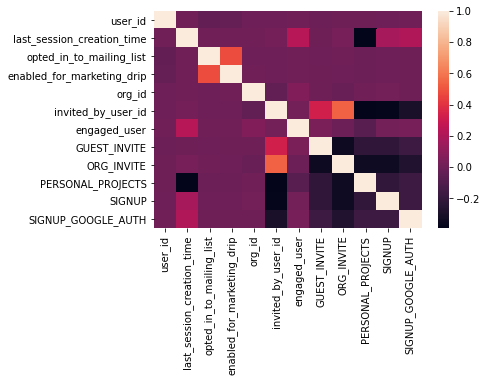

In [229]:
sns.heatmap(df.corr())

In [230]:
corr_mat = df.corr()
print(corr_mat['engaged_user'])

user_id                       0.006929
last_session_creation_time    0.233526
opted_in_to_mailing_list      0.009776
enabled_for_marketing_drip    0.005355
org_id                        0.062252
invited_by_user_id            0.020145
engaged_user                  1.000000
GUEST_INVITE                  0.046257
ORG_INVITE                   -0.009756
PERSONAL_PROJECTS            -0.075702
SIGNUP                        0.017351
SIGNUP_GOOGLE_AUTH            0.028698
Name: engaged_user, dtype: float64


At this point it looks like the most correlation is seen in the last time a session was created by that user, which makes sense. I would like to try some feature engineering of invited_by_user_id to see if I can work out if people tend to more likely be engaged if they successfully invite other people to our product. 

In [253]:
df_new.rename(columns={'':'user_id', 'invited_by_user_id':'total_successful_invites'}, inplace=True)

In [260]:
df_new.reset_index(inplace=True)
df_new.head()

,index,total_successful_invites
0,0.0,5279
1,2527.0,12
2,10741.0,11
3,11770.0,11
4,8068.0,10


In [262]:
df_new.rename(columns={'index':'user_id'}, inplace=True)
df_2 = pd.merge(df, df_new, how='left')

In [264]:
df_2.fillna(0, inplace=True)
df_2.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,total_successful_invites
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1,0,0,0,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,0,1,0,0,0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1,0,0,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1,0,0,0,0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1,0,0,0,0,0.0


<AxesSubplot:>

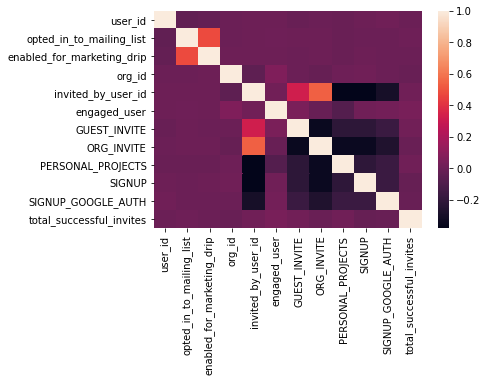

In [266]:
df_3 = df_2.drop(columns=['last_session_creation_time'])
sns.heatmap(df_3.corr())

In [267]:
print(df_3.corr()['engaged_user'])

user_id                       0.006929
opted_in_to_mailing_list      0.009776
enabled_for_marketing_drip    0.005355
org_id                        0.062252
invited_by_user_id            0.020145
engaged_user                  1.000000
GUEST_INVITE                  0.046257
ORG_INVITE                   -0.009756
PERSONAL_PROJECTS            -0.075702
SIGNUP                        0.017351
SIGNUP_GOOGLE_AUTH            0.028698
total_successful_invites      0.041621
Name: engaged_user, dtype: float64


In [270]:
X = df_3[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'GUEST_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 
          'SIGNUP_GOOGLE_AUTH', 'total_successful_invites']]
y = df_3['engaged_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [287]:
print(y_train)

5831     0.0
1        1.0
5697     1.0
10543    0.0
66       0.0
        ... 
9240     0.0
2792     0.0
8192     0.0
5372     0.0
7570     0.0
Name: engaged_user, Length: 8511, dtype: float64


In [292]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[2305  200]
 [ 288   45]]


In [293]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
mean_squared_error(y_test, y_predict)
clf.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[2505    0]
 [ 333    0]]


In [296]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth=2, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[2502    3]
 [ 331    2]]
